In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
from datetime import datetime, date, time

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    # long : 16-21
    # lat : 97-100
    #ymin = 16
    #ymax = 21
    #xmin = 97
    #xmax = 100
    ax.axis((xmin, xmax, ymin, ymax))
    print(basemap.shape)

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world[world.continent == 'Asia'].head()
world2 = world[(world.name == 'Thailand')| (world.name == 'Myanmar')| (world.name == 'Lao PDR')]
world2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
90,6834942.0,Asia,Lao PDR,LAO,13980.0,"POLYGON ((105.2187768900789 14.27321177821069,..."
105,48137741.0,Asia,Myanmar,MMR,55130.0,"POLYGON ((99.54330936075931 20.18659760180206,..."
156,65905410.0,Asia,Thailand,THA,547400.0,"POLYGON ((102.5849324890267 12.18659495691328,..."


(256, 256, 3)


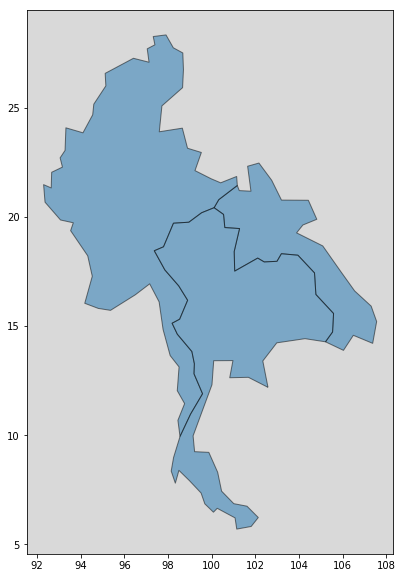

In [3]:
base = world2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(base, zoom=5, url=ctx.sources.ST_TONER_LITE) #ST_TONER_LITE,ST_TERRAIN_LABELS

In [7]:
#g1 = geopandas.GeoDataFrame.from_file("tha_SHP/tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm1_rtsd_20190221.shp")
#g1 = geopandas.GeoDataFrame.from_file("tha_SHP/tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm2_rtsd_20190221.shp")
x = g1['ADM1_PCODE'].str.rsplit("H", n=1, expand=True)
x
g1['ADM1_PCODE'] = x[1].astype(int)

In [5]:
g1 = g1[(g1['ADM1_PCODE'] >= 50 )&(g1['ADM1_PCODE'] <= 65 )]
g1

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1TH,ADM1ALT2TH,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,geometry
9,13.346345,1.900546,Chiang Mai,เชียงใหม่,50,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((99.52512253800006 20.13759816200007,..."
10,6.991487,0.999021,Chiang Rai,เชียงราย,57,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((99.96093267100008 20.46481752000005,..."
14,5.190935,0.723727,Kamphaeng Phet,กำแพงเพชร,62,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((99.48874719000008 16.91043508400003,..."
18,8.052475,1.068093,Lampang,ลำปาง,52,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((99.58445243100005 19.40596195600006,..."
19,5.001304,0.382707,Lamphun,ลำพูน,51,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((99.18820805000007 18.70631496200002,..."
22,9.923507,1.094682,Mae Hong Son,แม่ฮ่องสอน,58,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((98.05910462100007 19.80385101500008,..."
29,7.200337,0.801973,Nakhon Sawan,นครสวรรค์,60,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.026627224 16.18900333500005, 100..."
31,6.752652,1.045075,Nan,น่าน,55,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.8947850810001 19.63431591400007,..."
40,4.605114,0.532324,Phayao,พะเยา,56,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.4195319010001 19.72853561400007,..."
44,7.344660,0.892881,Phitsanulok,พิษณุโลก,65,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((101.003267657 17.73339883500006, 101..."


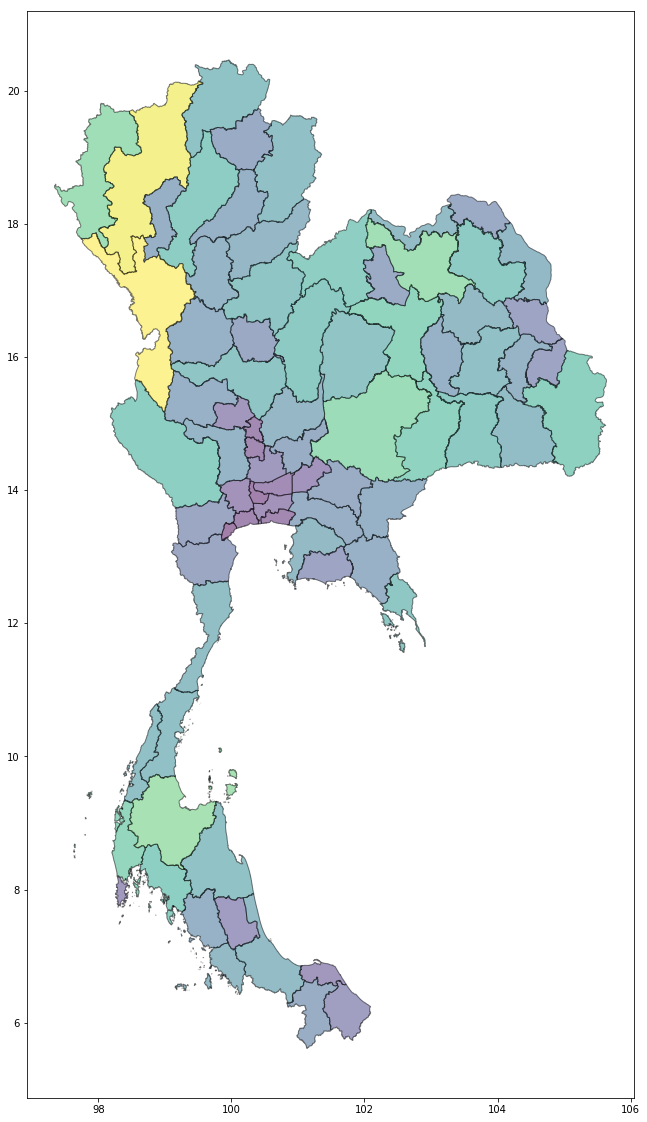

In [8]:
th_geo1 = g1[['ADM1_EN','geometry','Shape_Leng']]
th_geo1.head()
m = th_geo1.plot(figsize=(20, 20), alpha=0.5, edgecolor='k',column='Shape_Leng')
xmin, xmax, ymin, ymax = m.axis()

In [32]:
hp0 = pd.read_csv('Hotspot/fire_nrt_M6_45184.csv', index_col=False)
hp0.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,8.551,34.444,309.1,4.7,2.0,2019-01-01,0,Aqua,MODIS,76,6.0NRT,289.6,88.4,N
1,8.549,34.451,310.3,4.7,2.0,2019-01-01,0,Aqua,MODIS,80,6.0NRT,289.7,96.7,N
2,11.937,20.163,303.9,1.5,1.2,2019-01-01,0,Aqua,MODIS,58,6.0NRT,292.0,10.5,N
3,11.974,20.159,303.8,1.5,1.2,2019-01-01,0,Aqua,MODIS,57,6.0NRT,291.5,11.4,N
4,12.831,24.179,303.8,1.0,1.0,2019-01-01,0,Aqua,MODIS,57,6.0NRT,287.3,7.8,N


In [33]:
c = pd.to_datetime(list(hp0.acq_date), format="%Y-%m-%d") 

In [34]:
hp1 = pd.DataFrame()
hp1 = hp0[['brightness','confidence','bright_t31','frp','daynight']]
hp1['Date'] = pd.to_datetime(list(hp0.acq_date), format="%Y-%m-%d") 
hp1['Latitude'] = hp0['latitude']
hp1['Longitude'] = hp0['longitude']
hp1['Coordinates'] = list(zip(hp1.Longitude, hp1.Latitude))
hp1['Coordinates'] = hp1['Coordinates'].apply(Point)
print(xmin, xmax, ymin, ymax)

C:\Users\Ky\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ky\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ky\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

97.14261440245006 101.55898391055004 16.972215513200062 20.631400400800043


C:\Users\Ky\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [35]:
X = hp1.Latitude
Y = hp1.Longitude
gdf = hp1[ (X > xmin)&(X < xmax) & (Y > ymin) & (Y < ymax) & (c.year == 2018) & (c.month <= 3)& (hp1.confidence >10)]
print(gdf.shape)
gdf_TH = geopandas.GeoDataFrame(gdf, geometry='Coordinates')
gdf

(0, 9)


,brightness,confidence,bright_t31,frp,daynight,Date,Latitude,Longitude,Coordinates


C:\Users\Ky\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


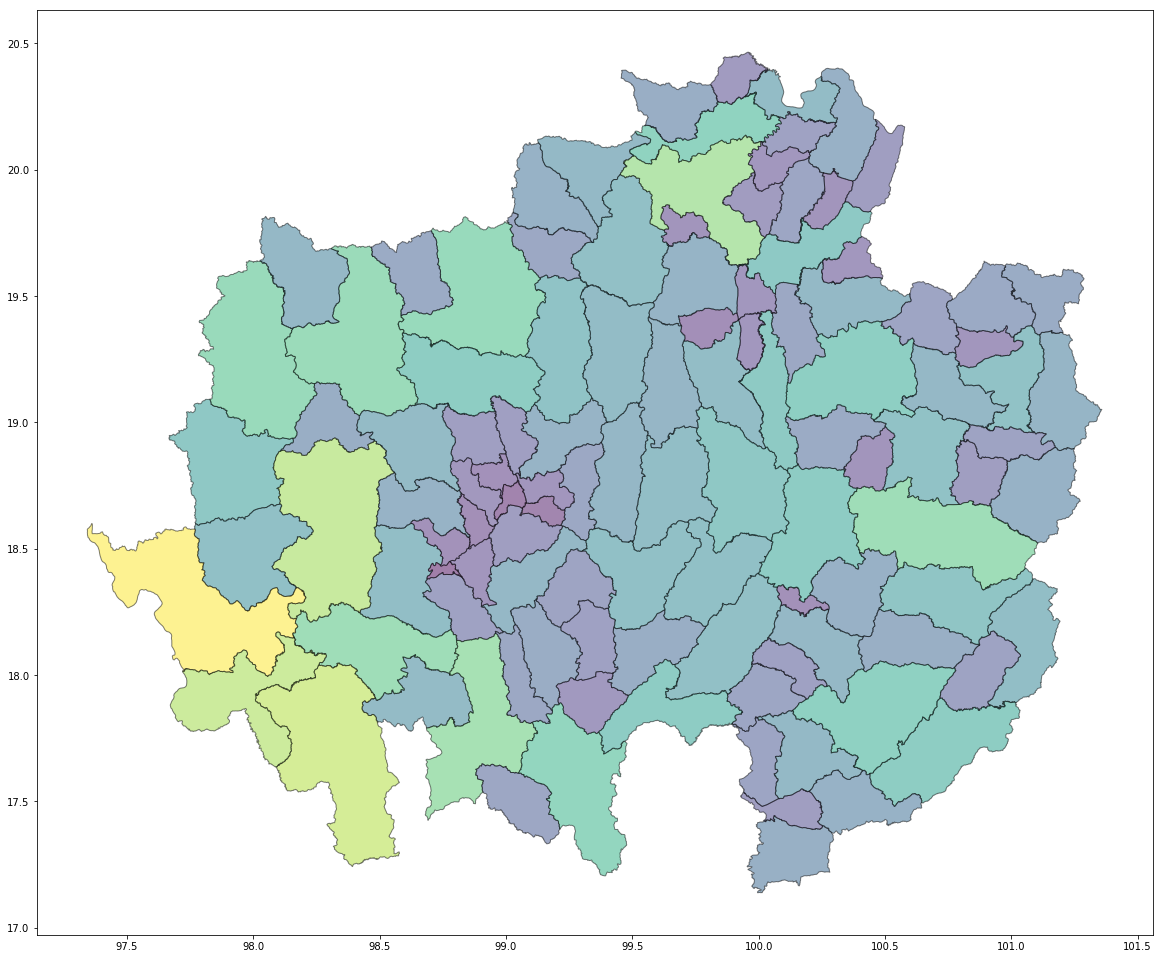

In [36]:
m = th_geo1.plot(figsize=(20, 20), alpha=0.5, edgecolor='k',column='Shape_Leng')
gdf_TH.plot(ax=m, marker='o', color='red', markersize = 5)
